<a href="https://colab.research.google.com/github/Mdipietro1990/masters-program/blob/CNN_models_HW/LeNet_and_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Loading in the data from my google drive
from google.colab import drive
drive.mount('/content/drive')

# I created the validation dataset using ~10% of the train data.
# Unzipping the train, test and validation datasets. 
!unzip '/content/drive/My Drive/Colab Notebooks/train.zip'
!unzip '/content/drive/My Drive/Colab Notebooks/test1.zip'
!unzip '/content/drive/My Drive/Colab Notebooks/validation.zip'


In [0]:
# Imports used for the two models for VGG16 and for LeNet

import numpy as np
import pandas as pd

import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# setting up the train and test data using the Keras ImageDataGenerator() API
# Which generates batches of tensor image data with real time data augmentation
# For LeNet it requires a size of 32 x 32
# The batch size default value is 32. 

train_data = '/content/train'
test_data = '/content/validation'

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_data,target_size=(32, 32), batch_size=32)

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_data, target_size=(32, 32))

Found 25000 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [0]:
# LeNet model creation using a sequental model structure. Convolutional layers, pooling layers
# and Dense fully connected layers.
# I also had to modify the input shape and change it from 32x32x1 to 32x32x3 the 
# 3 is used for 3 channels needed for RGB data

def build_model():
        model = keras.Sequential()

        model.add(layers.Conv2D(filters=6, 
                                kernel_size=(3, 3), 
                                activation='relu', 
                                input_shape=(32,32,3)))
        model.add(layers.AveragePooling2D())

        model.add(layers.Conv2D(filters=16, 
                                kernel_size=(3, 3), 
                                activation='relu'))
        model.add(layers.AveragePooling2D())

        model.add(layers.Flatten())

        model.add(layers.Dense(units=120, 
                              activation='relu'))

        model.add(layers.Dense(units=84, 
                              activation='relu'))

        model.add(layers.Dense(units=2, 
                              activation = 'softmax'))
        return model

In [0]:
# Building the model
model = build_model()
# Returning the model characteristics of the LeNet 
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_2 (Dense)              (None, 84)           

In [0]:
# The optimization used is Adam with a learning rate of 0.001 
opt = Adam(lr=0.001)
# Compiling the model to run 
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
# Executing the model with the given epochs with the training data and validation data. 
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





100/100 [==============================] - 18s 176ms/step - loss: 1.8009 - acc: 0.5187 - val_loss: 0.6946 - val_acc: 0.5219
Epoch 2/100
100/100 [==============================] - 10s 99ms/step - loss: 0.6794 - acc: 0.5703 - val_loss: 0.6721 - val_acc: 0.6281
Epoch 3/100
100/100 [==============================] - 10s 97ms/step - loss: 0.6731 - acc: 0.5981 - val_loss: 0.6609 - val_acc: 0.6188
Epoch 4/100
100/100 [==============================] - 9s 94ms/step - loss: 0.6712 - acc: 0.5922 - val_loss: 0.6559 - val_acc: 0.5969
Epoch 5/100
100/100 [==============================] - 10s 95ms/step - loss: 0.6494 - acc: 0.6197 - val_loss: 0.6536 - val_acc: 0.6219
Epoch 6/100
100/100 [==============================] - 10s 97ms/step - loss: 0.6451 - acc: 0.6338 - val_loss: 0.6412 - val_acc: 0.6000
Epoch 7/100
100/100 [==============================] - 10s 98ms/step - loss: 0.6455 - ac

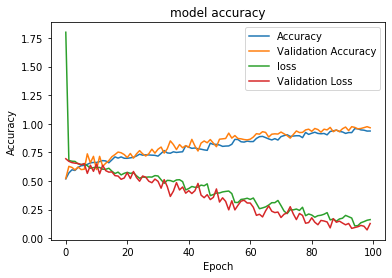

In [0]:
# Plotting the model metrics of accuracy, validation accuracy, loss and validation loss,
# looking at Accuracy on the y axis over the epoch on the axis.

plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


# Below is the model for the VGG16 



Setting up the VGG16 convolutional network

In [0]:
# setting up the train and test data using the Keras ImageDataGenerator() API
# Which generates batches of tensor image data with real time data augmentation
# For VGG16 convolutional network it requires a size of 224 x 224
# The batch size default value is 32. 

train_data = '/content/train'
test_data = '/content/validation'
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_data,target_size=(224,224), batch_size=32)
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_data, target_size=(224,224))

Found 25000 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [0]:
# creating the model and the different layers needed for the VGG16 convolutional network using the sequential model structure
# I am using the relu for the activation function. 
# I am using multiple convolutional layers, maxpooling and a few dense fully connected layers.
# the pool size is 2,2 matrix and a kernal size matrix of 3x3, with the edge padding set as "same"

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [0]:
# Combining and creating the model
# using 4096 nodes in each dense fully connected layer 
# with an output layer output of 2 using softmax to give a percentage between 0 and 1
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [0]:
# Building the model using the Adam optimizor, and a loss funtion of categorical cross entropy
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
# Info about the created model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 256)      

In [0]:
# setting up the checkpoints since this model takes a very long time to train.
# the steps per epoch is the same as the length of the number of batches of 32 images 
# Set the epoch count to 10 to insure training before the collab session times out

checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

hist = model.fit_generator(steps_per_epoch=100,
                           generator=traindata, 
                           validation_data= testdata, 
                           validation_steps=10,
                           epochs=100)
'''
hist = model.fit_generator(steps_per_epoch=len(traindata),
                           generator=traindata, 
                           validation_data= testdata, 
                           validation_steps=10,
                           epochs=100)
'''

Epoch 1/100
100/100 [==============================] - 111s 1s/step - loss: 7.9853 - acc: 0.5000 - val_loss: 7.8576 - val_acc: 0.5125
Epoch 2/100
100/100 [==============================] - 98s 985ms/step - loss: 7.9785 - acc: 0.5050 - val_loss: 7.8576 - val_acc: 0.5125
Epoch 3/100
100/100 [==============================] - 100s 1s/step - loss: 7.9984 - acc: 0.5038 - val_loss: 8.4116 - val_acc: 0.4781
Epoch 4/100
100/100 [==============================] - 98s 983ms/step - loss: 8.2807 - acc: 0.4862 - val_loss: 7.5554 - val_acc: 0.5312
Epoch 5/100
100/100 [==============================] - 98s 984ms/step - loss: 7.8525 - acc: 0.5128 - val_loss: 7.8576 - val_acc: 0.5125
Epoch 6/100
100/100 [==============================] - 98s 983ms/step - loss: 7.9986 - acc: 0.5037 - val_loss: 8.4620 - val_acc: 0.4750
Epoch 7/100
100/100 [==============================] - 100s 997ms/step - loss: 8.3059 - acc: 0.4847 - val_loss: 8.4326 - val_acc: 0.4768
Epoch 8/100
100/100 [==============================

'\nhist = model.fit_generator(steps_per_epoch=len(traindata),\n                           generator=traindata, \n                           validation_data= testdata, \n                           validation_steps=10,\n                           epochs=100)\n'

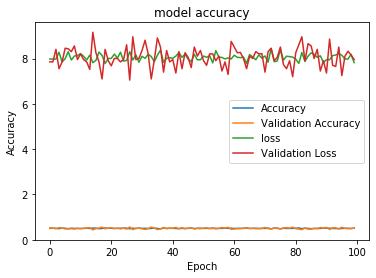

In [0]:
# Plotting the model metrics of accuracy, validation accuracy, loss and validation loss,
# looking at Accuracy on the y axis over the epoch on the axis.

plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

dog


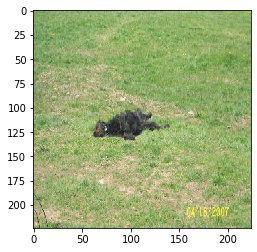

In [0]:
# Testing the model and seeing how it does at prediction of a given image of a 
# dog or cat.
from keras.preprocessing import image
img = image.load_img("/content/test1/10073.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
#saved_model = load_model("vgg16_1.h5")
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')